# Análisis Exploratorio de Datos ##

En el presente notebook se realizará un análisis exploratorio de los datos contenidos dentro del archivo **Bussines PKL**

In [126]:
import pandas as pd
import warnings
from locale import setlocale, LC_ALL
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
df_business= pd.read_pickle('business.pkl')
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# Revisa las dimensiones del Dataframe
shape = df_business.shape
print(f"Número de registros: {shape[0]:,}")
print(f"Columnas: {shape[1]}")

Número de registros: 150,346
Columnas: 28


Manejo de Columnas Duplicadas

In [128]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

In [129]:
df_business = df_business.loc[:, ~df_business.columns.duplicated()]
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


In [130]:
df_business.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


In [131]:
#Numero de negocios por categorias
df_business.categories.value_counts()

categories
Beauty & Spas, Nail Salons                                                                                       1012
Restaurants, Pizza                                                                                                935
Nail Salons, Beauty & Spas                                                                                        934
Pizza, Restaurants                                                                                                823
Restaurants, Mexican                                                                                              728
                                                                                                                 ... 
Dermatologists, Health & Medical, Cosmetic Surgeons, Doctors, Acne Treatment, Skin Care, Beauty & Spas              1
Home Services, Home & Garden, Nurseries & Gardening, Hardware Stores, Shopping, Building Supplies, Appliances       1
Food Trucks, Smokehouse, Restaurants, Food, B

# Manejo de Duplicados -_- Se eliminan **102** *registros duplicados*  en las columna 'categories'

In [132]:
#Conteo de valores duplicados para las categorias

print("Los duplicados en 'categories' son:",df_business.categories.duplicated().sum())

Los duplicados en 'categories' son: 67185


In [133]:
# Se eliminan los valores duplicados en "categories":

df_business = df_business.dropna(subset=['categories'])
print("Los duplicados en 'categories' son:",df_business.categories.duplicated().sum())

Los duplicados en 'categories' son: 67083


In [135]:
# Identificamos el numero de negocios para cada estado en USA contenido en nuestro dataframe
df_business['state'].value_counts()

state
PA     34013
FL     26311
TN     12045
IN     11238
MO     10909
LA      9917
AZ      9907
NJ      8529
NV      7712
AB      5571
CA      5201
ID      4463
DE      2261
IL      2142
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: count, dtype: int64

In [136]:
# Las coordenadas 32.321964, -110.928171, corresponden a la ciudad de Tucson, Arizona, en los Estados Unidos AZ
df_business[df_business.state == 'XMS']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
98688,X6y6DsgzGqb9v6Z53rvX9A,Bloom Salon & Beauty Bar,"6370 N Campbell Ave, Ste 140",Tucson,XMS,85718,32.321964,-110.928171,4.5,29,1,"{'BusinessAcceptsCreditCards': 'True', 'HairSp...","Hair Stylists, Blow Dry/Out Services, Hair Sal...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-12:0', '..."


In [74]:
# Las coordenadas 39.479779, -39.479779, corresponden a la ciudad de Reno, Nevada, en los Estados Unidos NV
df_business[df_business.state == 'SD']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
88416,DWGAjqjxTeQ6_z5PhiNyWQ,Absolute Dental,5032 S Virginia St,Reno,SD,89502,39.479779,-119.790018,2.5,39,1,"{'ByAppointmentOnly': 'False', 'AcceptsInsuran...","General Dentistry, Cosmetic Dentists, Health &...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."


In [75]:
# Obtener el listado de codigos postales para USA
codigos_postales = df_business['postal_code'].unique()
ZIPCODEFULL = pd.DataFrame(codigos_postales, columns=['CODIG_POST-EU'])


In [76]:
 #  Instanciamos los codigos postales de CA para poder realizar un remplazo de los codigos que no estan correctos
import requests
ZipCode_CA = [] 

for codigo_postal in ZIPCODEFULL['CODIG_POST-EU']:
    url = f"http://api.zippopotam.us/us/{codigo_postal}"
    respuesta = requests.get(url)
    if respuesta.status_code == 200:
        datos = respuesta.json()
        if datos['places']:
            lugar = datos['places'][0]
            if lugar['state abbreviation'] == 'CA':
                ZipCode_CA.append(codigo_postal)
    else:
        pass

print(ZipCode_CA)   
num_elements = len(ZipCode_CA)
print("Codigos encontrados en Dataframe df_business: para CA", num_elements)

['93101', '93103', '93105', '93109', '93117', '93013', '93108', '93110', '93118', '93111', '93190', '96161', '93106', '93001', '93140', '90261', '93102', '93067', '93160', '93041', '93121', '93130', '91307', '96143', '92260', '93120', '90041', '92805', '92324', '93031', '93014', '93030', '90703', '95050', '94960', '93199', '91355', '92026', '93107', '94804', '96150', '95661', '93150', '91390', '91306', '93642', '92626', '93907']
Codigos encontrados en Dataframe df_business: para CA 48


In [137]:
df_business.loc[df_business['postal_code'].isin(ZipCode_CA), 'state'] = 'CA'
df_business['state'].value_counts()

state
PA     32847
FL     25413
TN     11645
IN     10844
MO     10539
CA     10223
LA      9567
AZ      9518
NJ      8223
NV      7439
AB      5396
ID      4308
DE      2192
IL      2066
TX         4
CO         3
WA         2
HI         2
MA         2
SD         1
VI         1
XMS        1
UT         1
MI         1
MT         1
NC         1
VT         1
Name: count, dtype: int64

In [138]:
# Identifico el número de los negocios para el estado de California
filtrado= df_business[df_business['state']=='CA']
filtrado['categories'].value_counts()

categories
Restaurants, Mexican                                                                66
Beauty & Spas, Nail Salons                                                          57
Restaurants, Pizza                                                                  54
Mexican, Restaurants                                                                39
Pizza, Restaurants                                                                  37
                                                                                    ..
Event Photography, Event Planning & Services, Photographers, Session Photography     1
Bakeries, Desserts, Food                                                             1
Periodontists, Health & Medical, Cosmetic Dentists, General Dentistry, Dentists      1
Restaurants, Asian Fusion, Thai, Taiwanese, Noodles                                  1
Restaurants, Specialty Food, Food, Sandwiches, Italian                               1
Name: count, Length: 7620, dtype

In [139]:
#Filtro los negocios para la categoria que contenga la palabra restaurant en todo el dataset
df_restaurantes= df_business[df_business['categories'].str.lower().str.contains('restaurant')].reset_index(drop=True)
df_restaurantes.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [140]:
#De los 52286 registros observamos que Philadelphia no pertence a California 
# el codigo 19107 pertenece a  Pennsylvania
df_restaurantes

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,TN,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,37207,36.208102,-86.76817,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,MO,33602,27.955269,-82.45632,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52281,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,TN,19018,39.925656,-75.310344,3.0,11,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Restaurants, Sandwiches, Convenience Stores, C...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
52282,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,1,"{'WiFi': ''free'', 'RestaurantsGoodForGroups':...","Cafes, Juice Bars & Smoothies, Coffee & Tea, R...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-17:0', '..."
52283,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,MO,19147,39.935982,-75.158665,4.5,35,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
52284,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,PA,19014,39.856185,-75.427725,4.5,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [141]:
# Filtramos solo los restaurantes de el Estado no 06 en USA  California 
df_restaurantes_CA = df_restaurantes[df_restaurantes['state'].eq('CA') & df_restaurantes['postal_code'].isin(ZipCode_CA)]
df_restaurantes_CA 

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
37,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
55,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
146,4xhGQGdGqU60BIznBjqnuA,California Tacos and Taproom,956 Embarcadero Del Norte,Isla Vista,CA,93117,34.411555,-119.855077,4.0,49,0,"{'Music': '{'dj': False, 'background_music': F...","Mexican, Beer Bar, Bars, Sports Bars, Nightlif...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-22:0', ..."
154,ifjluUv4VASwmFqEp8cWlQ,Marty's Pizza,2733 De La Vina St,Santa Barbara,CA,93105,34.436236,-119.726147,4.0,64,1,"{'Alcohol': 'u'none'', 'BusinessAcceptsCreditC...","Pizza, Restaurants","{'Tuesday': '11:0-21:30', 'Wednesday': '11:0-2..."
166,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,"7320 Hollister Ave, Ste 1",Goleta,CA,93117,34.430542,-119.882367,4.0,189,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","Burgers, Cafes, Restaurants, Mexican, American...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-20:30', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52222,izSgTrqebu8bN8ONOCs6cQ,Oat Bakery,5 W Haley St,Santa Barbara,CA,93101,34.416548,-119.695626,5.0,123,1,"{'Alcohol': 'u'none'', 'HasTV': 'False', 'Bike...","Bakeries, Vegan, Specialty Food, Food Delivery...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-18:0', '..."
52241,2xxkaRy7rP5EUyjFt2J5kA,Nikka Ramen,5701 Calle Real,Goleta,CA,93117,34.440885,-119.823523,4.5,562,1,"{'ByAppointmentOnly': 'False', 'Alcohol': 'u'b...","Restaurants, Japanese, Ramen","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2..."
52253,TSwMwVq5GtQh5LW2t32uGA,Woody's Roundup Bar & Grill,"Earl Warren Showgrounds, 3400 Calle Real",Santa Barbara,CA,93105,34.430895,-119.735645,2.0,6,0,"{'Caters': 'True', 'BusinessParking': '{'garag...","Barbeque, Bars, Restaurants, Nightlife",None
52263,8BUr8GviR2o_b-brO21wwQ,Kyle's Isla Vista,900 Embarcadero Del Mar,Isla Vista,CA,93117,34.412966,-119.856886,2.5,12,1,"{'OutdoorSeating': 'True', 'BusinessAcceptsBit...","Restaurants, Burgers, Food, Ice Cream & Frozen...",None


In [142]:
df_restaurantes_CA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1164 entries, 37 to 52271
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   1164 non-null   object
 1   name          1164 non-null   object
 2   address       1164 non-null   object
 3   city          1164 non-null   object
 4   state         1164 non-null   object
 5   postal_code   1164 non-null   object
 6   latitude      1164 non-null   object
 7   longitude     1164 non-null   object
 8   stars         1164 non-null   object
 9   review_count  1164 non-null   object
 10  is_open       1164 non-null   object
 11  attributes    1154 non-null   object
 12  categories    1164 non-null   object
 13  hours         992 non-null    object
dtypes: object(14)
memory usage: 136.4+ KB


In [143]:
# Selecionamos los restaurantes abiertos
df_restaurantes_CA= df_restaurantes_CA[df_restaurantes_CA['is_open']==1].reset_index(drop=True)

In [144]:
#eliminar columnas que no se van a utiliza
df_restaurantes_CA.drop(columns=['is_open','state'], inplace=True)
df_restaurantes_CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   671 non-null    object
 1   name          671 non-null    object
 2   address       671 non-null    object
 3   city          671 non-null    object
 4   postal_code   671 non-null    object
 5   latitude      671 non-null    object
 6   longitude     671 non-null    object
 7   stars         671 non-null    object
 8   review_count  671 non-null    object
 9   attributes    665 non-null    object
 10  categories    671 non-null    object
 11  hours         637 non-null    object
dtypes: object(12)
memory usage: 63.0+ KB


In [145]:
# Identificamos cuantos tipos de negocios existen ofreciendo servicios
df_restaurantes_CA.categories.value_counts()

categories
Restaurants, Mexican                                                                                                                             21
Mexican, Restaurants                                                                                                                             13
Restaurants, Pizza                                                                                                                                8
Thai, Restaurants                                                                                                                                 4
Sushi Bars, Japanese, Restaurants                                                                                                                 3
                                                                                                                                                 ..
Restaurants, Food, Fast Food, Burgers, Coffee & Tea                                                  

In [146]:
#Filtro los servicios solo para California
categorias_unicas = df_restaurantes_CA['categories'].unique()
for categoria in categorias_unicas:
    print(categoria)

Food, Restaurants, Salad, Coffee & Tea, Breakfast & Brunch, Sandwiches, Bakeries
Live/Raw Food, Restaurants, Seafood, Beer Bar, Beer, Wine & Spirits, Bars, Food, Nightlife
Pizza, Restaurants
Burgers, Cafes, Restaurants, Mexican, American (Traditional)
Food, Restaurants, Chinese, Bubble Tea, Vietnamese
Chicken Wings, Salad, Restaurants, Pizza, Italian, Sandwiches
Restaurants, Thai
Themed Cafes, Cafes, Pets, Arts & Entertainment, Women's Clothing, Coffee & Tea, Shopping, Pet Adoption, Fashion, Pet Sitting, Accessories, Pet Stores, Pet Services, Food, Restaurants
Food, Food Delivery Services, Burgers, Pizza, Caterers, Event Planning & Services, Restaurants
Wineries, Food, Restaurants, Arts & Entertainment, Festivals, Food Stands
Breweries, Shopping, Food Court, Food, Venues & Event Spaces, Restaurants, Event Planning & Services, Wineries, Wine Tasting Room, Arts & Entertainment, Shopping Centers
Chinese, Restaurants, Asian Fusion, Szechuan
Food, Vietnamese, Restaurants, Bubble Tea
Sandwic

In [147]:
# Identificamos los servicios unicos en el total de filas
categorias_unicas = df_restaurantes_CA['categories'].unique()
KTunicas = []

for categoria in categorias_unicas:
    unique_values = set(categoria.split(', '))
    KTunicas.extend(unique_values)

KTunicas = list(set(KTunicas))

print(KTunicas)

['Brewpubs', 'Nail Salons', 'Religious Organizations', 'Wine Bars', 'Ethnic Grocery', 'Tex-Mex', 'Brazilian', 'Pasta Shops', 'Bars', 'Imported Food', 'Bubble Tea', 'Pop-Up Restaurants', 'Arcades', 'Home Services', 'Home & Garden', 'Restaurants', 'Caterers', 'Chinese', 'Street Vendors', 'Cocktail Bars', 'Public Markets', 'Cuban', 'Beer Gardens', 'Lounges', 'Hotels & Travel', 'Health Retreats', 'Gastropubs', 'Cooking Classes', 'Pest Control', 'Tasting Classes', 'Cosmetics & Beauty Supply', 'Personal Chefs', 'Flowers & Gifts', 'Wine Tours', 'Desserts', 'Herbal Shops', 'Tea Rooms', 'Coffee Roasteries', 'Cosmetic Surgeons', 'Organic Stores', 'Florists', 'Halal', 'Convenience Stores', 'Australian', 'Specialty Schools', 'Fish & Chips', 'Tacos', 'Wraps', 'Accessories', 'Pet Stores', 'Venues & Event Spaces', 'Taiwanese', 'Breakfast & Brunch', 'Chicken Wings', 'Food Delivery Services', 'Local Services', 'Patisserie/Cake Shop', 'Day Spas', 'Falafel', 'Spanish', 'Garage Door Services', 'Chiropract

In [148]:
# Validamos si existen las categorias de estilos de cocina que nos interesan, dentro del total del dataset

categorias_interes = [
"American","American (Traditional)","American (New)","Argentine",
"Asian Fusion","Brazilian", "British","Caribbean","Chilean",
"Colombian","Cuban","Dominican","French","Hawaiian","Indian",
"Italian","Japanese","Korean","Latin American","Lebanese",
"Mediterranean","Mexican","MiddleEastern","Moroccan",
"Peruvian","Puerto Rican","Salvadoran","Scandinavian",
"Spanish","Thai","Turkish","Venezuelan","Vietnamese"
] 

result = {}

for categoria in categorias_interes:
    result[categoria] = False

index_list = []

for item in KTunicas:
    subcategories = item.split(',')
    for subcategoria in subcategories:
        subcategoria = subcategoria.strip()
        if subcategoria in categorias_interes:
            result[subcategoria] = True
            index_list.append(1)

print("No".ljust(10) + "| Servicios_CA".ljust(20) + "          | Encontrados")
print("-" * 61)

index = 0
for categoria, found in result.items():
    if found:
        index += index_list[0]
        index_list.pop(0)
        print(f"{index:<10}| {categoria.ljust(28)}| {found}")

No        | Servicios_CA                | Encontrados
-------------------------------------------------------------
1         | American (Traditional)      | True
2         | American (New)              | True
3         | Argentine                   | True
4         | Asian Fusion                | True
5         | Brazilian                   | True
6         | British                     | True
7         | Cuban                       | True
8         | French                      | True
9         | Hawaiian                    | True
10        | Indian                      | True
11        | Italian                     | True
12        | Japanese                    | True
13        | Korean                      | True
14        | Latin American              | True
15        | Lebanese                    | True
16        | Mediterranean               | True
17        | Mexican                     | True
18        | Moroccan                    | True
19        | Salvadoran                

In [149]:
categorias_interes = [
"American","American (Traditional)","American (New)","Argentine",
"Asian Fusion","Brazilian", "British","Caribbean","Chilean",
"Colombian","Cuban","Dominican","French","Hawaiian","Indian",
"Italian","Japanese","Korean","Latin American","Lebanese",
"Mediterranean","Mexican","MiddleEastern","Moroccan",
"Peruvian","Puerto Rican","Salvadoran","Scandinavian",
"Spanish","Thai","Turkish","Venezuelan","Vietnamese"
] 

# Convertir la columna 'categories' a minúsculas y realizar la búsqueda para cada palabra clave
condiciones = [df_restaurantes_CA['categories'].str.lower().str.contains(palabra.lower()) for palabra in categorias_interes]

# Obtener el DataFrame filtrado
df_filtrado = df_restaurantes_CA[pd.concat(condiciones, axis=1).any(axis=1)]

# Imprimir el DataFrame filtrado
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 3 to 670
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   396 non-null    object
 1   name          396 non-null    object
 2   address       396 non-null    object
 3   city          396 non-null    object
 4   postal_code   396 non-null    object
 5   latitude      396 non-null    object
 6   longitude     396 non-null    object
 7   stars         396 non-null    object
 8   review_count  396 non-null    object
 9   attributes    393 non-null    object
 10  categories    396 non-null    object
 11  hours         380 non-null    object
dtypes: object(12)
memory usage: 40.2+ KB


In [150]:
categorias_unicas = df_filtrado['categories'].unique()
for categoria in categorias_unicas:
    print(categoria)

Burgers, Cafes, Restaurants, Mexican, American (Traditional)
Food, Restaurants, Chinese, Bubble Tea, Vietnamese
Chicken Wings, Salad, Restaurants, Pizza, Italian, Sandwiches
Restaurants, Thai
Chinese, Restaurants, Asian Fusion, Szechuan
Food, Vietnamese, Restaurants, Bubble Tea
American (Traditional), Vegetarian, Restaurants
Thai, Restaurants
Restaurants, Soup, Salad, Thai
American (Traditional), Restaurants, Seafood, Burgers, Tacos, Sandwiches, Mexican, Bars, Food, Beer Bar, Juice Bars & Smoothies, Nightlife
Bars, Burgers, Restaurants, Nightlife, Sports Bars, American (New)
Mexican, Restaurants, Food Trucks, Food
Mexican, Arts & Entertainment, Festivals, Restaurants, Religious Organizations, Churches
Restaurants, Fast Food, Mexican, Tacos, Burgers, Breakfast & Brunch
Restaurants, American (Traditional), Food Delivery Services, Caterers, Venues & Event Spaces, Cocktail Bars, Bars, Wedding Planning, Nightlife, Food, Event Planning & Services
Sushi Bars, Caterers, Food, Fast Food, Event 

In [151]:
df_filtrado.reset_index(drop=True, inplace=True)
df_filtrado.shape

(396, 12)

In [152]:
df_filtrado.head(5)

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours
0,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,"7320 Hollister Ave, Ste 1",Goleta,93117,34.430542,-119.882367,4.0,189,"{'RestaurantsGoodForGroups': 'True', 'Business...","Burgers, Cafes, Restaurants, Mexican, American...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-20:30', ..."
1,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,903 Embarcadero Del Norte,Isla Vista,93117,34.412934,-119.855531,3.0,184,"{'RestaurantsDelivery': 'True', 'BikeParking':...","Food, Restaurants, Chinese, Bubble Tea, Vietna...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
2,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,270 Storke Rd,Goleta,93117,34.429043,-119.869362,2.5,94,"{'RestaurantsPriceRange2': '2', 'Alcohol': 'u'...","Chicken Wings, Salad, Restaurants, Pizza, Ital...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-20:0', ..."
3,18eWJFJbXyR9j_5xfcRLYA,Siam Elephant,509 Linden Ave,Carpinteria,93013,34.39651,-119.521681,4.5,460,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Restaurants, Thai","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2..."
4,MiMRlsXOpHJMSTDAuw8s1w,Su’s Bowl,"901 Embarcadero Del Mar, Unit 100",Isla Vista,93117,34.412924,-119.857337,3.5,18,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Chinese, Restaurants, Asian Fusion, Szechuan","{'Monday': '0:0-0:0', 'Tuesday': '17:0-21:0', ..."


In [153]:
#Eliminamos la columna hours
df_filtrado.drop(columns=['hours'], inplace=True)
df_filtrado.head(5)

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,attributes,categories
0,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,"7320 Hollister Ave, Ste 1",Goleta,93117,34.430542,-119.882367,4.0,189,"{'RestaurantsGoodForGroups': 'True', 'Business...","Burgers, Cafes, Restaurants, Mexican, American..."
1,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,903 Embarcadero Del Norte,Isla Vista,93117,34.412934,-119.855531,3.0,184,"{'RestaurantsDelivery': 'True', 'BikeParking':...","Food, Restaurants, Chinese, Bubble Tea, Vietna..."
2,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,270 Storke Rd,Goleta,93117,34.429043,-119.869362,2.5,94,"{'RestaurantsPriceRange2': '2', 'Alcohol': 'u'...","Chicken Wings, Salad, Restaurants, Pizza, Ital..."
3,18eWJFJbXyR9j_5xfcRLYA,Siam Elephant,509 Linden Ave,Carpinteria,93013,34.39651,-119.521681,4.5,460,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Restaurants, Thai"
4,MiMRlsXOpHJMSTDAuw8s1w,Su’s Bowl,"901 Embarcadero Del Mar, Unit 100",Isla Vista,93117,34.412924,-119.857337,3.5,18,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Chinese, Restaurants, Asian Fusion, Szechuan"


In [155]:
df_filtrado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   396 non-null    object
 1   name          396 non-null    object
 2   address       396 non-null    object
 3   city          396 non-null    object
 4   postal_code   396 non-null    object
 5   latitude      396 non-null    object
 6   longitude     396 non-null    object
 7   stars         396 non-null    object
 8   review_count  396 non-null    object
 9   attributes    393 non-null    object
 10  categories    396 non-null    object
dtypes: object(11)
memory usage: 34.2+ KB


In [156]:
#En nuestro dataset existen 396 opciones gastronomicas activas en California
len(df_filtrado['business_id'].unique())

396

In [164]:
# Copiamos dos columnas del dataset para realizar la apertura por categorías
df_categories = df_filtrado.copy()
df_categories = df_categories[["business_id", "categories"]]
df_categories.head()
df_categories.to_csv('categorias.csv',index=False)

In [158]:
df_categories.shape

(396, 2)

In [159]:
# Realizamos un explode la columna anidada en categorías:
df_categories = df_categories.assign(categories=df_categories['categories'].str.split(',')).explode('categories')
df_categories["categories"] = df_categories["categories"].str.strip()
df_categories.shape

(2165, 2)

In [160]:
# Se seleccionan las categorías que vamos a analizar
categorias_interes = [
"American","American (Traditional)","American (New)","Argentine",
"Asian Fusion","Brazilian", "British","Caribbean","Chilean",
"Colombian","Cuban","Dominican","French","Hawaiian","Indian",
"Italian","Japanese","Korean","Latin American","Lebanese",
"Mediterranean","Mexican","MiddleEastern","Moroccan",
"Peruvian","Puerto Rican","Salvadoran","Scandinavian",
"Spanish","Thai","Turkish","Venezuelan","Vietnamese"
] 


# Se filtran las categorías en el dataframe
df_categories = df_categories[df_categories["categories"].isin(categorias_interes)]
df_categories.shape

(500, 2)

In [161]:
df_categories.head()

,business_id,categories
0,VeFfrEZ4iWaecrQg6Eq4cg,Mexican
0,VeFfrEZ4iWaecrQg6Eq4cg,American (Traditional)
1,bdfZdB2MTXlT6-RBjSIpQg,Vietnamese
2,xwSWtJcQkzTF6HNm_IMgcg,Italian
3,18eWJFJbXyR9j_5xfcRLYA,Thai


In [101]:
# Se exporta el listado de categorías a un archivo parquet:
df_categories.to_parquet("categories_yelp.parquet")

In [102]:
# Se elimina la columna "categories" del df original:
df_filtrado.drop(columns=['categories'], inplace=True)
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   396 non-null    object
 1   name          396 non-null    object
 2   address       396 non-null    object
 3   city          396 non-null    object
 4   postal_code   396 non-null    object
 5   latitude      396 non-null    object
 6   longitude     396 non-null    object
 7   stars         396 non-null    object
 8   review_count  396 non-null    object
 9   attributes    393 non-null    object
dtypes: object(10)
memory usage: 31.1+ KB


In [103]:
# Se crea una tabla nueva con los atributos de los restaurantes
atributos_restaurant = df_filtrado[["business_id", "attributes"]]
atributos_restaurant = pd.concat([atributos_restaurant, pd.json_normalize(atributos_restaurant["attributes"])], axis=1)
atributos_restaurant = atributos_restaurant.drop(columns="attributes")
atributos_restaurant.head()

,business_id,RestaurantsGoodForGroups,BusinessAcceptsCreditCards,WiFi,RestaurantsAttire,RestaurantsPriceRange2,RestaurantsTakeOut,GoodForKids,HasTV,RestaurantsReservations,...,ByAppointmentOnly,CoatCheck,Music,GoodForDancing,BestNights,Smoking,AgesAllowed,Open24Hours,DietaryRestrictions,RestaurantsCounterService
0,VeFfrEZ4iWaecrQg6Eq4cg,True,True,u'no','casual',1,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bdfZdB2MTXlT6-RBjSIpQg,True,True,u'no',u'casual',1,True,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,xwSWtJcQkzTF6HNm_IMgcg,True,True,u'no','casual',2,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18eWJFJbXyR9j_5xfcRLYA,True,True,u'no','casual',2,True,True,True,True,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MiMRlsXOpHJMSTDAuw8s1w,NaN,True,u'free',NaN,NaN,True,NaN,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
atributos_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   business_id                 396 non-null    object
 1   RestaurantsGoodForGroups    326 non-null    object
 2   BusinessAcceptsCreditCards  378 non-null    object
 3   WiFi                        351 non-null    object
 4   RestaurantsAttire           311 non-null    object
 5   RestaurantsPriceRange2      349 non-null    object
 6   RestaurantsTakeOut          384 non-null    object
 7   GoodForKids                 319 non-null    object
 8   HasTV                       360 non-null    object
 9   RestaurantsReservations     355 non-null    object
 10  BusinessParking             373 non-null    object
 11  BusinessAcceptsBitcoin      108 non-null    object
 12  NoiseLevel                  319 non-null    object
 13  OutdoorSeating              377 non-null    object

In [105]:
# Elimino la columna "attributes" del df original:
df_filtrado = df_filtrado.drop(columns="attributes")
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   396 non-null    object
 1   name          396 non-null    object
 2   address       396 non-null    object
 3   city          396 non-null    object
 4   postal_code   396 non-null    object
 5   latitude      396 non-null    object
 6   longitude     396 non-null    object
 7   stars         396 non-null    object
 8   review_count  396 non-null    object
dtypes: object(9)
memory usage: 28.0+ KB


In [106]:
# Se exportan ambos archivos en formato parquet:
df_filtrado.to_parquet("Restaurants_Yelp.parquet")

atributos_restaurant.to_parquet("Atributos_Restaurantes_Yelp.parquet")

In [107]:
df_filtrado.head()

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count
0,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,"7320 Hollister Ave, Ste 1",Goleta,93117,34.430542,-119.882367,4.0,189
1,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,903 Embarcadero Del Norte,Isla Vista,93117,34.412934,-119.855531,3.0,184
2,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,270 Storke Rd,Goleta,93117,34.429043,-119.869362,2.5,94
3,18eWJFJbXyR9j_5xfcRLYA,Siam Elephant,509 Linden Ave,Carpinteria,93013,34.39651,-119.521681,4.5,460
4,MiMRlsXOpHJMSTDAuw8s1w,Su’s Bowl,"901 Embarcadero Del Mar, Unit 100",Isla Vista,93117,34.412924,-119.857337,3.5,18


In [108]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   396 non-null    object
 1   name          396 non-null    object
 2   address       396 non-null    object
 3   city          396 non-null    object
 4   postal_code   396 non-null    object
 5   latitude      396 non-null    object
 6   longitude     396 non-null    object
 7   stars         396 non-null    object
 8   review_count  396 non-null    object
dtypes: object(9)
memory usage: 28.0+ KB


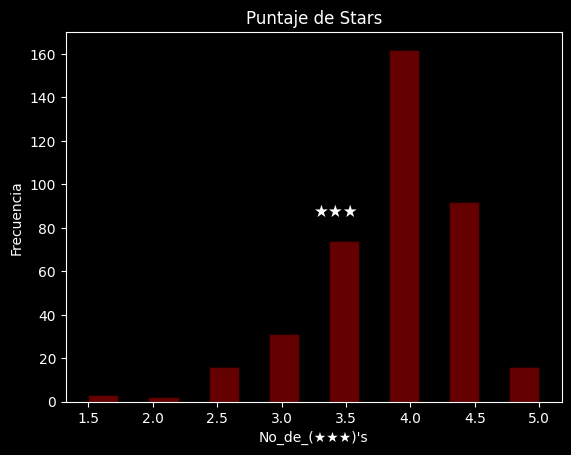

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_filtrado['stars'] = df_filtrado['stars'].astype(float)

# Create the seaborn distplot
ax = sns.distplot(df_filtrado['stars'], bins=15, kde=False, color='RED', hist_kws={'edgecolor':'black'})

# Set the axes and spines to white
for spine in ax.spines.values():
    spine.set_color('white')

# Set the title, xlabel, and ylabel to white
ax.set_title('Puntaje de Stars', color='white')
ax.set_xlabel("No_de_(★★★)'s", color='white')
ax.set_ylabel('Frecuencia', color='white')

# Set tick labels to white
ax.tick_params(colors='white')

# Annotate the plot with the Unicode code
ax.annotate('★★★', xy=(0.5, 0.5), xycoords='axes fraction', color='white', fontsize=12)

plt.show()

In [112]:
# Filtramos por la ciudad de  Santa Barbara para ubicar su  ID y remplazarlo por el valor correcto
validar_duplicados = df_filtrado.duplicated(subset='city', keep=False)
Sin_duplicados = df_filtrado.duplicated(subset='city') == False
depuracion = df_filtrado[Sin_duplicados | ~validar_duplicados].copy()
Lista_ciudades = depuracion[depuracion['city'].str.startswith('Santa', na=False)]
print(Lista_ciudades[['city','business_id']])

               city             business_id
8     Santa Barbara  jW4a3W9-UkFxpglHvo_Kqg
336  Santa  Barbara  bBA62rVklEG2WUnvi8RtrQ


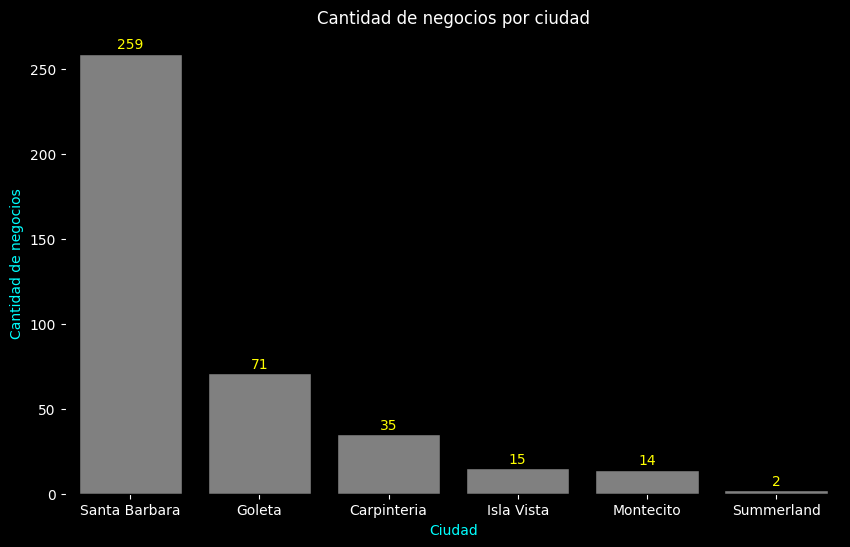

In [125]:
# Reemplazar el valor en la columna 'city' por el valor "Santa Barbara" para los índices donde el valor de la columna 'business_id' sea "bBA62rVklEG2WUnvi8RtrQ"
df_filtrado.loc[df_filtrado[df_filtrado['business_id'] == 'bBA62rVklEG2WUnvi8RtrQ'].index, 'city'] = 'Santa Barbara'

# Obtener el conteo de cada ciudad
city_count = df_filtrado['city'].value_counts()

# Crear un dataframe con el conteo de cada ciudad
df_city_count = pd.DataFrame({'city': city_count.index, 'count': city_count.values})

# Generar la gráfica utilizando seaborn
sns.set_style(rc={'axes.facecolor': 'black', 'figure.facecolor':'black'})
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='city', y='count', data=df_city_count, color='Gray', edgecolor='Black')

# Configurar los ejes y las etiquetas
plt.xlabel('Ciudad',color='Cyan')
plt.ylabel('Cantidad de negocios',color='Aqua')
plt.xticks(rotation=0,color='RED')
plt.title('Cantidad de negocios por ciudad', color='white')
ax.tick_params(colors='white')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center",
            color='yellow')

# Mostrar la gráfica
plt.show()



In [114]:
df_filtrado.to_parquet('df_business.parquet', index=False)